### **Baseline Model Result Summary**

In [2]:
import os
os.chdir('..')
%pwd

'/root/autodl-tmp/counterfactual_fairness_emotional_recognition'

#### 1. Performance

In [4]:
import pandas as pd

# pred_df = pd.read_csv('../results/pred_df_20220404_065523.csv', index_col=0)
# pred_df

training_log_df = pd.read_csv('../log/log_20220404_065523.csv', index_col=0)
training_log_df

,epoch,train_accuracy,val_accuracy,train_uar,val_uar
0,0,0.478333,0.315421,0.478333,0.439359
1,1,0.511667,0.383178,0.511667,0.490534
2,2,0.535833,0.371495,0.535833,0.445344
3,3,0.538333,0.355140,0.538333,0.462756
4,4,0.557500,0.399533,0.557500,0.451041
...,...,...,...,...,...
295,295,0.994167,0.532710,0.994167,0.500251
296,296,0.998333,0.492991,0.998333,0.475393
297,297,0.998333,0.490654,0.998333,0.479603
298,298,0.998333,0.511682,0.998333,0.498732


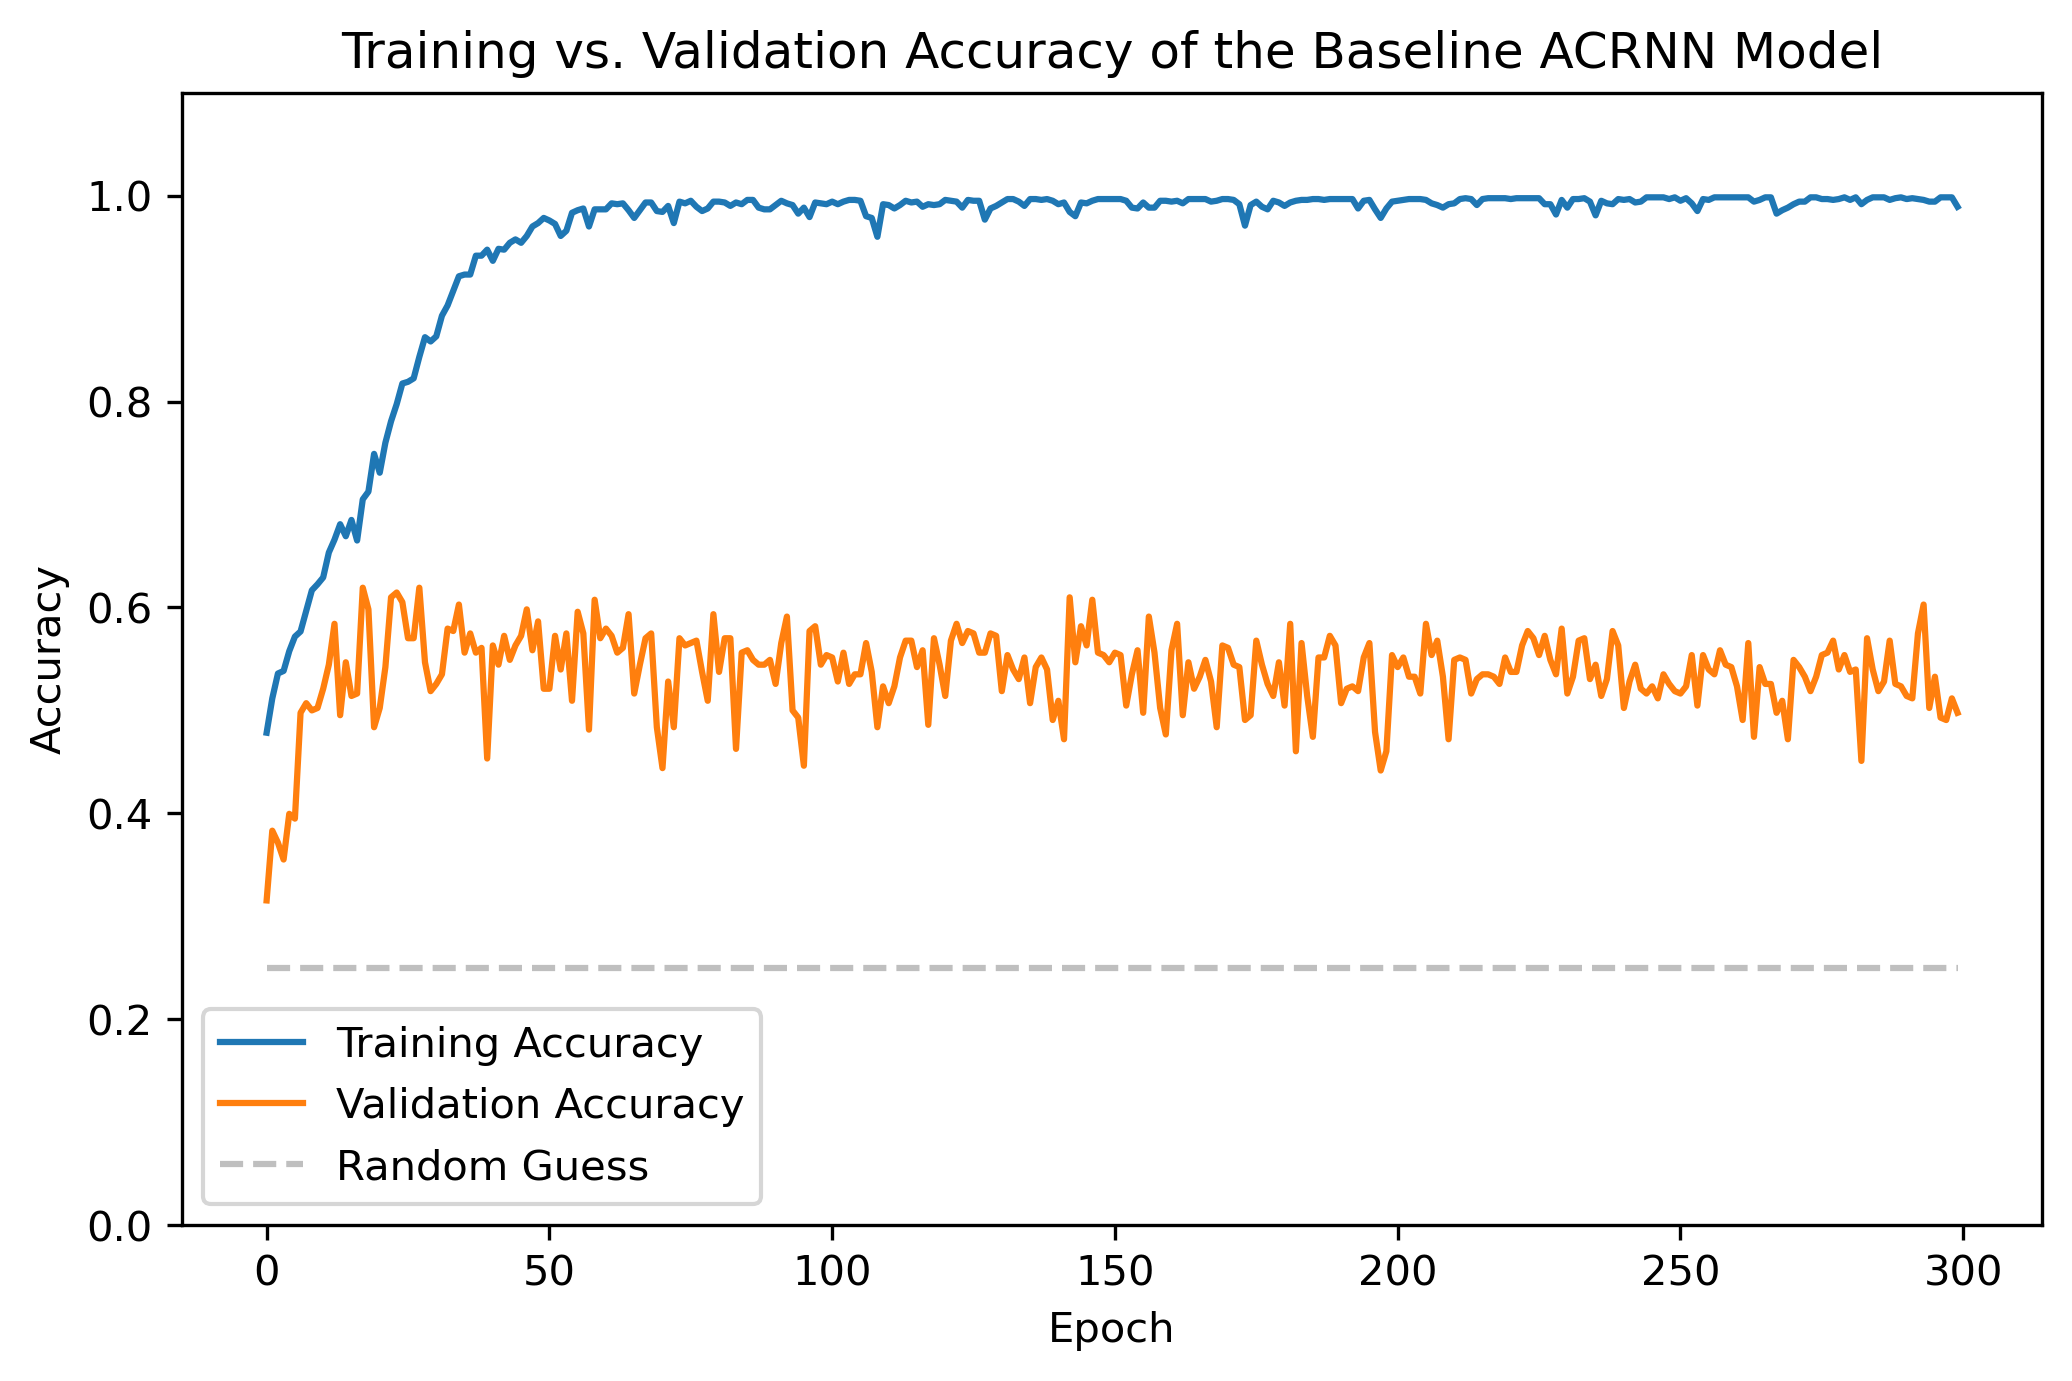

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.plot(training_log_df['epoch'], training_log_df['train_accuracy'], label='Training Accuracy')
ax.plot(training_log_df['epoch'], training_log_df['val_accuracy'], label='Validation Accuracy')
ax.plot(training_log_df['epoch'], [0.25] * len(training_log_df), color="grey", linestyle='dashed', alpha=0.5, label='Random Guess')

plt.ylim((0, 1.1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy of the Baseline ACRNN Model")
plt.legend()

plt.show()

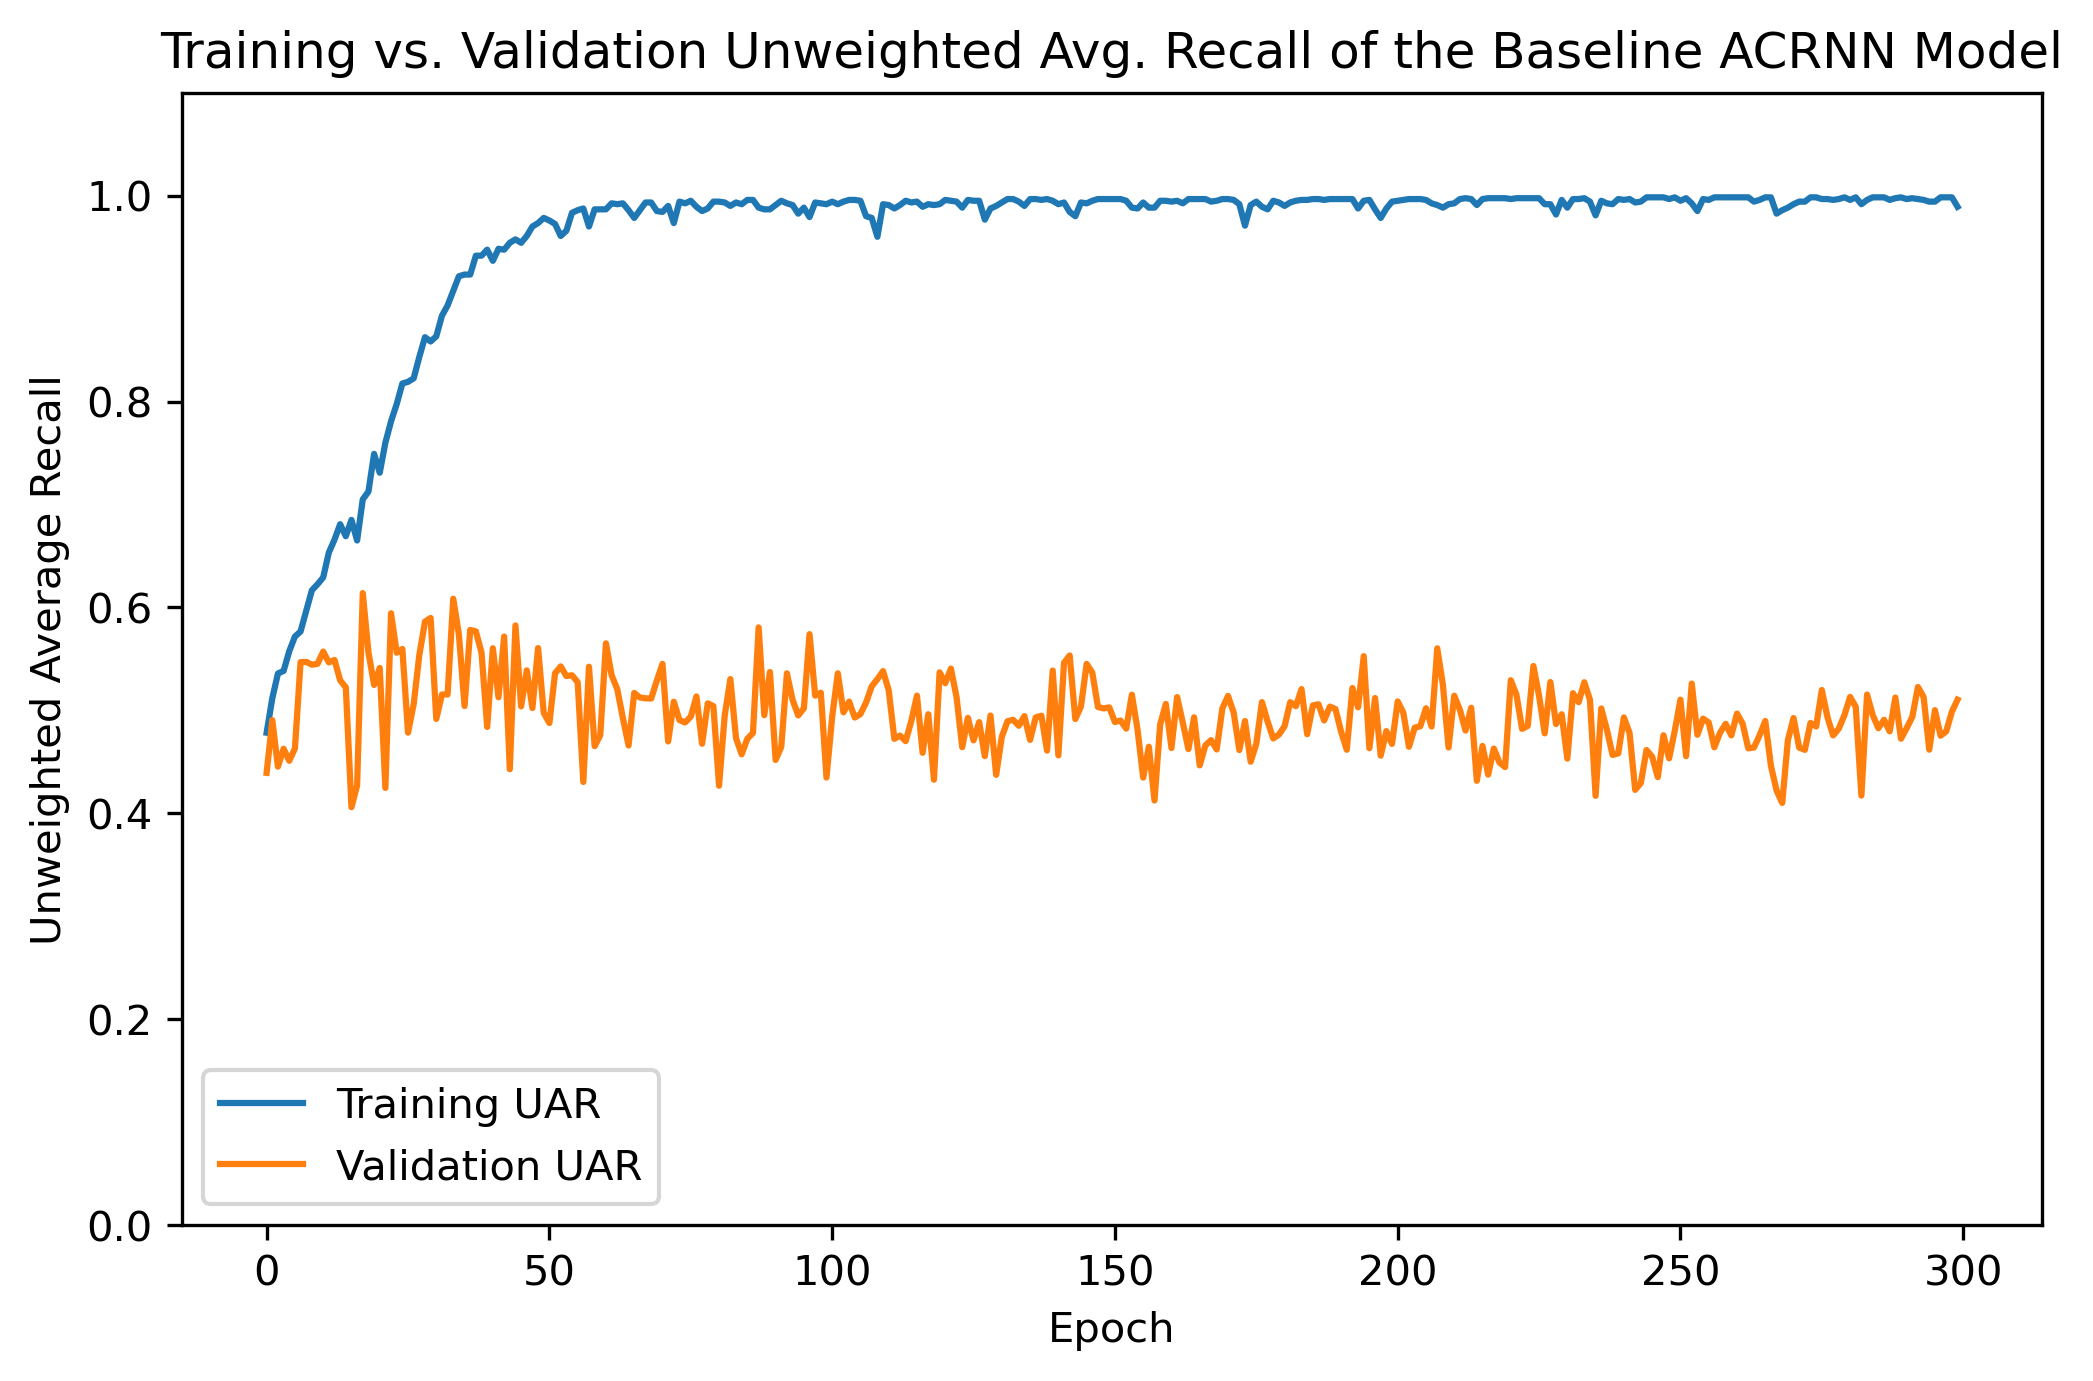

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.plot(training_log_df['epoch'], training_log_df['train_uar'], label='Training UAR')
ax.plot(training_log_df['epoch'], training_log_df['val_uar'], label='Validation UAR')

plt.ylim((0, 1.1))
plt.xlabel("Epoch")
plt.ylabel("Unweighted Average Recall")
plt.title("Training vs. Validation Unweighted Avg. Recall of the Baseline ACRNN Model")
plt.legend()

plt.show()

#### **2 Fairness**

In [2]:
import pandas as pd
pred_df = pd.read_csv('../results/pred_df_20220404_065523.csv', index_col=0)
pred_df

,gender,y_true,y_pred
0,1,3.0,1.0
1,0,2.0,2.0
2,1,3.0,0.0
3,1,1.0,1.0
4,0,3.0,3.0
...,...,...,...
423,1,1.0,3.0
424,1,0.0,3.0
425,1,2.0,1.0
426,0,3.0,1.0


In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_df['y_true'], pred_df['y_pred'])

0.29906542056074764

In [5]:
from sklearn.metrics import confusion_matrix

confusion_mtx_male = confusion_matrix(pred_df.loc[pred_df['gender'] == 0, 'y_true'], pred_df.loc[pred_df['gender'] == 0, 'y_pred'])
confusion_mtx_male_normalized = confusion_mtx_male / confusion_mtx_male.sum(axis=1).reshape(-1, 1)
print('["ang","sad","hap","neu"]')
print(confusion_mtx_male)
print(confusion_mtx_male_normalized)

["ang","sad","hap","neu"]
[[ 3  6  1  4]
 [11  8 10 21]
 [ 8  7 12 14]
 [25 23 26 46]]
[[0.21428571 0.42857143 0.07142857 0.28571429]
 [0.22       0.16       0.2        0.42      ]
 [0.19512195 0.17073171 0.29268293 0.34146341]
 [0.20833333 0.19166667 0.21666667 0.38333333]]


In [6]:
confusion_mtx_female = confusion_matrix(pred_df.loc[pred_df['gender'] == 1, 'y_true'], pred_df.loc[pred_df['gender'] == 1, 'y_pred'])
confusion_mtx_female_normalized = confusion_mtx_female / confusion_mtx_female.sum(axis=1).reshape(-1, 1)
print('["ang","sad","hap","neu"]')
print(confusion_mtx_female)
print(confusion_mtx_female_normalized)

["ang","sad","hap","neu"]
[[ 2  3  1  7]
 [ 6 20  7 24]
 [ 5 19  6  9]
 [ 6 40 17 31]]
[[0.15384615 0.23076923 0.07692308 0.53846154]
 [0.10526316 0.35087719 0.12280702 0.42105263]
 [0.12820513 0.48717949 0.15384615 0.23076923]
 [0.06382979 0.42553191 0.18085106 0.32978723]]


\begin{equation}
    \textbf{Fairness}=min(\frac{\sum_{c}{p(y_{pred}=c|y_{true}=c,s=s_0, \mathbf{X})}}{\sum_{c}{p(y_{pred}=c|y_{true}=c,s=s_1, \mathbf{X})}}, \frac{\sum_{c}{p(y_{pred}=c|y_{true}=c,s=s_1, \mathbf{X})}}{\sum_{c}{p(y_{pred}=c|y_{true}=c,s=s_0, \mathbf{X})}})
\end{equation}

In [7]:
import numpy as np

m = confusion_mtx_male_normalized
f = confusion_mtx_female_normalized
equal_opportunities = np.array([np.min((m[i, i] / f[i, i], f[i, i] / m[i, i])) for i in range(len(m))])
print('["ang","sad","hap","neu"]')
print(equal_opportunities)

["ang","sad","hap","neu"]
[0.71794872 0.456      0.52564103 0.86031452]


In [8]:
print(f"Probability of female samples to be correctly classified as [ang]: {f[0, 0]}")
print(f"Probability of male samples to be correctly classified as [ang]: {m[0, 0]}")

Probability of female samples to be correctly classified as [ang]: 0.15384615384615385
Probability of male samples to be correctly classified as [ang]: 0.21428571428571427


In [9]:
print(f"Probability of female samples to be correctly classified as [sad]: {f[1, 1]}")
print(f"Probability of male samples to be correctly classified as [sad]: {m[1, 1]}")

Probability of female samples to be correctly classified as [sad]: 0.3508771929824561
Probability of male samples to be correctly classified as [sad]: 0.16


In [10]:
print(f"Probability of female samples to be correctly classified as [hap]: {f[2,2]}")
print(f"Probability of male samples to be correctly classified as [hap]: {m[2,2]}")

Probability of female samples to be correctly classified as [hap]: 0.15384615384615385
Probability of male samples to be correctly classified as [hap]: 0.2926829268292683


In [11]:
print(f"Probability of female samples to be correctly classified as [neu]: {f[3,3]}")
print(f"Probability of male samples to be correctly classified as [neu]: {m[3,3]}")

Probability of female samples to be correctly classified as [neu]: 0.32978723404255317
Probability of male samples to be correctly classified as [neu]: 0.38333333333333336


In [2]:
import pickle

with open('../data/IEMOCAP.pkl', 'rb') as f:

    data = pickle.load(f)

data[1].shape

(1200, 1)

In [3]:
import pickle
import numpy as np
import pandas as pd

with open("log/log_20220429_114253_locked_dropout_activation_reg_twin.pkl", 'rb') as f:

    log = pickle.load(f)



In [5]:
max(log.validation_uar)

0.528936266874351

In [5]:
import pickle

with open('log/log_20220427_102123_baseline_stable4.pkl', 'rb') as f:
    log = pickle.load(f)

max(log.validation_uar)


0.5864669868466598

In [10]:
import os
import re
import pickle

baseline_stable_best_uar = []

for file in os.listdir('log'):
    if re.match(r".*baseline_stable.*", file):
        with open(f"log/{file}", 'rb') as f:
            log = pickle.load(f)
        baseline_stable_best_uar.append(max(log.validation_uar))
        # print(file)

In [12]:
import numpy as np

baseline_stable_best_uar = np.array(baseline_stable_best_uar)
print(baseline_stable_best_uar.mean(), baseline_stable_best_uar.std())

0.5580537527402792 0.022024922774166046


In [13]:
import os
import re
import pickle

lockdropout_best_uar = []

for file in os.listdir('log'):
    if re.match(r".*034421_locked_dropout.*", file):
        with open(f"log/{file}", 'rb') as f:
            log = pickle.load(f)
        lockdropout_best_uar.append(max(log.validation_uar))
        # print(file)

In [14]:
import numpy as np

lockdropout_best_uar = np.array(lockdropout_best_uar)
print(lockdropout_best_uar.mean(), lockdropout_best_uar.std())

0.5456941199376947 0.014283533267308659


In [15]:
import os
import re
import pickle

ld_ar_best_uar = []

for file in os.listdir('log'):
    if re.match(r".*113548_locked_dropout_activation_reg.*", file):
        with open(f"log/{file}", 'rb') as f:
            log = pickle.load(f)
        ld_ar_best_uar.append(max(log.validation_uar))
        # print(file)

In [16]:
import numpy as np

ld_ar_best_uar = np.array(ld_ar_best_uar)
print(ld_ar_best_uar.mean(), ld_ar_best_uar.std())

0.5278479794046382 0.018132300233498745


In [19]:
baseline_stable_best_uar

array([0.54221833, 0.59505884, 0.60808238, 0.58646699, 0.59707295,
       0.59307178, 0.56333831, 0.557786  , 0.56751687, 0.56579483,
       0.55457879, 0.56906369, 0.55902021, 0.54853107, 0.54771331,
       0.56789979, 0.57002964, 0.56263629, 0.56576562, 0.54377163,
       0.55764538, 0.53226246, 0.53875151, 0.5220697 , 0.542545  ,
       0.53726095, 0.54929474, 0.54546772, 0.54082403, 0.51007377])

In [18]:
lockdropout_best_uar

array([0.54143843, 0.55880495, 0.55697257, 0.55729491, 0.56375151,
       0.5597179 , 0.56051077, 0.56091857, 0.57333204, 0.55627596,
       0.56173741, 0.55484272, 0.55642415, 0.54657862, 0.56234856,
       0.53702622, 0.55364529, 0.53270379, 0.5224245 , 0.52586751,
       0.53375736, 0.53582879, 0.53398776, 0.52910826, 0.52423308,
       0.53094929, 0.5363242 , 0.52850143, 0.53641507, 0.53910198])

In [17]:
ld_ar_best_uar

array([0.54900593, 0.55210172, 0.50332079, 0.5176986 , 0.51789655,
       0.51097374, 0.52274251, 0.55002488, 0.51523776, 0.54847265,
       0.52604599, 0.52499243, 0.53807979, 0.50787794, 0.55887201,
       0.52811418, 0.50898776, 0.51944444, 0.51188127, 0.50218393,
       0.53220838, 0.50624243, 0.51316091, 0.52408814, 0.57414871,
       0.55600662, 0.53223217, 0.52721314, 0.53667792, 0.5195061 ])